<img src="../images/cads-logo.png" width=200 align=left>
<img src="../images/python-logo.png" width=200 align=right>

In [1]:
#!conda install pandas
import pandas as pd
from IPython.display import display

In [2]:
import numpy as np

# Pandas
- [Pandas](#Pandas)
- [Introduction to Pandas](#Introduction-to-Pandas)
- [Series](#Series)
    - [Initializing Series](#Initializing-Series)
    - [Selecting Elements](#Selecting-Elements)
        - [loc](#loc)
        - [iloc](#iloc)
    - [Combining Series](#Combining-Series)
    - [Exercises](#Exercises)
        - [Exercise 1](#Exercise-1)
        - [Exercise 2](#Exercise-2)
        - [Exercise 3](#Exercise-3)
- [DataFrames](#DataFrames)
    - [Creating DataFrames](#Creating-DataFrames)
        - [Series as Rows](#Series-as-Rows)
        - [Series as Columns](#Series-as-Columns)
        - [Summary](#Summary)
    - [Pandas Pretty Print in Jupyter](#Pandas-Pretty-Print-in-Jupyter)
    - [Importing and Exporting Data](#Importing-and-Exporting-Data)
        - [Reading CSV](#Reading-CSV)
        - [Writing CSV](#Writing-CSV)
    - [Selecting Data](#Selecting-Data)
    - [Exercises](#Exercises)
        - [Exercise 1](#Exercise-1)
        - [Exercise 2](#Exercise-2)
        - [Exercise 3](#Exercise-3)
        - [Exercise 4](#Exercise-4)
- [Data Processing](#Data-Processing)
    - [Aggregation](#Aggregation)
    - [Arithmetic](#Arithmetic)
    - [Grouping](#Grouping)
    - [Unique and Duplicate Values](#Unique-and-Duplicate-Values)
        - [unique](#unique)
        - [duplicate](#duplicate)
    - [Exercises](#Exercises)
        - [Exercise 1](#Exercise-1)
        - [Exercise 2](#Exercise-2)
        - [Exercise 3](#Exercise-3)
        - [Exercise 4](#Exercise-4)
- [Merge Data Frames](#Merge-Data-Frames)
    - [Exercises](#Exercises)
        - [Exercise 1](#Exercise-1)
- [Reshaping Data Frames](#Reshaping-Data-Frames)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Exercise 1](#Exercise-1)
    - [Exercise 2](#Exercise-2)
    - [Exercise 3](#Exercise-3)
    - [Exercise 4](#Exercise-4)
        - [Stacking and Unstacking Data Frames](#Stacking-and-Unstacking-Data-Frames)
    - [Exercise 5](#Exercise-5)
    - [Exercise 6](#Exercise-6)


## Introduction to Pandas

[Pandas](http://pandas.pydata.org/) is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. Pandas is free software released under the three-clause BSD license. The name is derived from the term _panel data_, an econometrics term for multidimensional structured data sets.

At it's core, Pandas consists of NumPy arrays and additional functions to perform typical data analysis tasks.

**Resources**:  
* [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/index.html), especially
[10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Hernan Rojas' learn-pandas](https://bitbucket.org/hrojas/learn-pandas)  
* [Harvard CS109 lab1 content](https://github.com/cs109/2015lab1)

## Series
Series form the basis of Pandas. They are essentially Python dictionaries with some added bells and whistles. However, Pandas Series 'keys' are called indices.

### Initializing Series
Series can be initialized from Python objects like lists or tuples. If only values are given, Pandas generates default indices.

In [3]:
animals = ['Tiger', 'Bear', 'Moose']
pd.Series(animals)

0    Tiger
1     Bear
2    Moose
dtype: object

In [4]:
numbers = [1, 2, 3]
pd.Series(numbers)

0    1
1    2
2    3
dtype: int64

Series can be mixed type

In [5]:
# Create a mixed series
mixed = [1, 2, "Three"]
print(pd.Series(mixed))
print()
print(type(mixed[0]))
print(type(mixed[1]))
print(type(mixed[2]))

0        1
1        2
2    Three
dtype: object

<class 'int'>
<class 'int'>
<class 'str'>


Series also support missing values via the `None` type.

In [6]:
#create a pandas series with None
#observe the dtype
animals = ['Tiger', 'Bear', None]
print(pd.Series(animals))
print("")
print(type(animals[0]))
print(type(animals[1]))
print(type(animals[2]))

0    Tiger
1     Bear
2     None
dtype: object

<class 'str'>
<class 'str'>
<class 'NoneType'>


In [7]:
numbers = [1, 2, None]
print(pd.Series(numbers))
print("")
print(type(numbers[0]))
print(type(numbers[1]))
print(type(numbers[2]))

0    1.0
1    2.0
2    NaN
dtype: float64

<class 'int'>
<class 'int'>
<class 'NoneType'>


We can define custom keys during initialization.

In [8]:
sports = pd.Series(
    data=["Bhutan", "Scotland", "Japan", "South Korea"], 
    index=["Archery", "Golf", "Sumo", "Taekwondo"])
print(sports)

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object


Alternatively, Series can also be initialized with dictionaries. Indices are then generated from the dictionary keys.

In [9]:
#create a pandas series from dictionary
sports = pd.Series({
    'Archery': 'Bhutan',
    'Golf': 'Scotland',
    'Sumo': 'Japan',
    'Taekwondo': 'South Korea'})
print(sports)

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object


We can list values and indices of series.

In [10]:
print(sports)
print()

print(sports.index)
print()

print(sports.values)

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

Index(['Archery', 'Golf', 'Sumo', 'Taekwondo'], dtype='object')

['Bhutan' 'Scotland' 'Japan' 'South Korea']


In [11]:
print(sports[0])
print()
print(sports.iloc[0])
print()
print(sports.iloc[-1])

Bhutan

Bhutan

South Korea


Series type

In [12]:
type(sports)

pandas.core.series.Series

### Selecting Elements
As a result of iterative development of the Pandas library, there are several ways to select elements of a Series. Most of them are considered "legacy", however, and the best practice is to use `*.loc[...]` and `*.iloc[...]`. Take care to use the square brackets with `loc` and `iloc`, *not* the regular brackets as you would with functions.

#### loc 
Select elements by their indices. If the index is invalid, either a `TypeError` or a `KeyError` will be thrown.

In [13]:
print(sports.loc['Golf'])

Scotland


In [14]:
print(sports.loc['Soccer']) #not in list

KeyError: 'Soccer'

In [ ]:
print(sports)

#### iloc
Select elements by their numerical IDs, i.e. the n-th element. 

In [ ]:
#loc - for cari 'literally' (ll)
#iloc - for cari 'index' return value, index kiri, kanan value(ii)

In [ ]:
print(sports.iloc[1])

If the indices were **autogenerated** then both loc and iloc seem to be identical.

In [ ]:
sports_noindex = pd.Series(sports.values) #index sports, values country
print(sports_noindex)
print("")
print(sports_noindex.loc[1]) #'l'iterally find "1"
print(sports_noindex.iloc[1]) #location at 'i'ndex 1

Take care to keep your code semantically correct, however. For example, if the series is resorted, the index of each element stays the same, but the ID changes!

In [ ]:
sports_noindex_sorted = sports_noindex.sort_values()
print(sports_noindex_sorted)
print("")

print(sports_noindex_sorted.loc[1]) #loc cari nombor/string tu 'l'iterally
print(sports_noindex_sorted.iloc[1]) #iloc based on tmpt default 'i'ndex 0,1,2

If you want to select by index then use `loc`, if you want to select by ID then use `iloc`. Do not use them interchangeably just because they return the same results right now. This will eventually lead to bugs in your code.

### Combining Series
Series can be combined by appending one to another

In [ ]:
s1 = pd.Series(["A", "B", "C"])
s2 = pd.Series(["D", "E", "F"])
print(s1)
print("")
print(s2)
print("")

s3 = s1.append(s2)
print(s3)

In [ ]:
s3 = s1.concat(s2)
print(s3)

Notice the duplicate indices! Pandas permits this and selecting by `loc` will return *both* entries

In [ ]:
print(s3.loc[0])


In [ ]:

print(s3.iloc[0])

Also notice that if your selection of a Series results in a single entry, Pandas automatically converts it to its base type, i.e. a string in this case. If the selection consists of more than 1 entry, however, a Series is returned.

In [ ]:
print(s3.loc[0])
print(type(s3.loc[0])) #more than 1, series
print("")
print(s3.iloc[0])
print(type(s3.iloc[0])) # 1, str value

### Exercises

#### Exercise 1
Create a pandas Series object from the following movie ratings
    
    The Avengers: 9.2
    Mr. Bean: 7.4
    Garfield: 2.1
    Star Wars The Force Awakens: 8.8

In [ ]:
### Your code here #2024

ratings = pd.Series({
    'The Avengers': '9.2',
    'Mr. Bean': '7.4',
    'Garfield': '2.1',
    'Star Wars The Force Awakens': '8.8'})

print(ratings)

In [ ]:
movies = pd.Series(
    index=["The Avengers", "Mr. Bean", "Garfield", "Star Wars The Force Awakens"],
    data=["9.2", "7.4", "2.1", "8.8"])

print(movies)

In [15]:
# Alternative method via Python dictionary format
movies = pd.Series({
    'The Avengers': '9.2',
    'Mr. Bean': '7.4',
    'Garfield': '2.1',
    'Star Wars The Force Awakens': '8.8'})
print(movies)

The Avengers                   9.2
Mr. Bean                       7.4
Garfield                       2.1
Star Wars The Force Awakens    8.8
dtype: object


#### Exercise 2
Select the rating for the movie 'Garfield'.

In [16]:
### Your code here 2024
print(ratings.loc['Garfield'])

NameError: name 'ratings' is not defined

In [17]:
print(movies.loc["Garfield"])

2.1


#### Exercise 3
Select the **index** of the 2$^{nd}$ entry

In [18]:
### Your code here
print(ratings.index[1])

NameError: name 'ratings' is not defined

In [19]:
print(movies.index[1],movies.iloc[1])

Mr. Bean 7.4


## DataFrames

Multiple series with common indices can form a data frame. A data frame is like a table, with rows and columns (e.g., as in SQL or Excel).

|  .   | Animal | Capital |
| --- | --- | --- |
| India | a | b |
| Sweden | a | b |

Each row usually denotes an entry in our data and each column a feature we're interested in.

### Creating DataFrames

#### Series as Rows
Data frames can be created by glueing together Series objects as rows. In this case, the series indices become the data frame columns

In [20]:
#series=one column multiple rows, dataframes=multiple column&rows
#1st to make dataframes

row1 = pd.Series(("Elephant", "New Delhi"), index=("Animal", "Capital"))
row2 = pd.Series(("Reindeer", "Stockholm"), index=("Animal", "Capital"))
print(row1)
print()
print(row2)
df = pd.DataFrame(data=[row1, row2], index=("India", "Sweden"))
df #dataframe 

Animal      Elephant
Capital    New Delhi
dtype: object

Animal      Reindeer
Capital    Stockholm
dtype: object


,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm


As before, we can make use of Pandas' flexibility and replace the Series objects with a dictionary

In [21]:
#2nd way to make dataframes

df = pd.DataFrame(
    data=[
        {"Animal": "Elephant", "Capital": "New Delhi"},
        {"Animal": "Reindeer", "Capital": "Stockholm"}],
    index=("India", "Sweden"))
df

,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm


Or even a list of lists

In [22]:
#3rd way to make dataframes, list of list

df = pd.DataFrame(
    data=[["Elephant", "New Delhi"], 
          ["Reindeer", "Stockholm"]],
    index=["India", "Sweden"],
    columns=["Animal", "Capital"])
df

,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm


In [23]:
print (df)

          Animal    Capital
India   Elephant  New Delhi
Sweden  Reindeer  Stockholm


In [24]:
display(df)

,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm


In [25]:
#4th way to make dataframes
df = pd.DataFrame({
    "Animal": {
        "India": "Elephant",
        "Sweden": "Reindeer"},
    "Capital": {
        "India": "New Delhi",
        "Sweden": "Stockholm"}})
df

,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm


In [26]:
#5th way to make dataframes
df = pd.DataFrame({
    'Animal':['Elephant','Reindeer'],
    'Capital':['New Delhi','Stockholm']
}, 
    index =['India','Sweden'])

df

,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm


Make sure to match indices and columns when combining series. Pandas won't necessarily raise an error but perform flexible merging.

In [27]:
row1 = pd.Series(("Elephant", "New Delhi"), index=("Animal", "City"))
row2 = pd.Series(("Reindeer", "Stockholm"), index=("Animal", "Capital"))
print(row1)
print()
print(row2)
df = pd.DataFrame(data=[row1, row2], index=("India", "Sweden"))
display(df) #automatically NaN at none

Animal     Elephant
City      New Delhi
dtype: object

Animal      Reindeer
Capital    Stockholm
dtype: object


,Animal,City,Capital
India,Elephant,New Delhi,NaN
Sweden,Reindeer,NaN,Stockholm


#### Series as Columns
We can also create data frames column-wise

In [28]:
#6th way to make dataframes, using columns

#col1 = pd.Series(["Elephant", "Reindeer"]) ERROR JADI NAN
#col2 = pd.Series(["New Delhi", "Stockholm"])
col1 = pd.Series({
    "India": "Elephant", 
    "Sweden": "Reindeer"})
col2 = pd.Series({
    "India": "New Delhi", 
    "Sweden": "Stockholm"})

print(col1)
print()
print(col2)

#df = pd.DataFrame(data=[col1,col2],
#                columns = ["Animal", "Capital" ], ERROR JADI NAN
#                index = ["India", "Sweden"])

df = pd.DataFrame(data={"Animal": col1, "Capital": col2},
                  index = ["India", "Sweden"])
df

India     Elephant
Sweden    Reindeer
dtype: object

India     New Delhi
Sweden    Stockholm
dtype: object


,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm


#### Summary
Series are pasted together to become data frames. They can be pasted as:
- rows: `data=[series1, series2, ...]`
- columns: `data=[series1, series2, ...]`

We can use the same `*.index` and `*.values` attributes as for Series

In [29]:
display(df)
print(df.index)
print(df.columns)
print(df.values) #values=data

,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm


Index(['India', 'Sweden'], dtype='object')
Index(['Animal', 'Capital'], dtype='object')
[['Elephant' 'New Delhi']
 ['Reindeer' 'Stockholm']]


### Pandas Pretty Print in Jupyter
Jupyter has a 'pretty print' option for Pandas dataframes. Using `print` will print the dataframes in Jupyter as they would appear in a standard console. But leaving it away or using IPython's `display` function will render them as HTML tables

In [30]:
print(df)

          Animal    Capital
India   Elephant  New Delhi
Sweden  Reindeer  Stockholm


In [31]:
from IPython.display import display
display(df)

,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm


Jupyter allows a shortcut for the `display` function. If we execute a Python command or line of code that results in a data frame, Jupyter will assume we want to display it and do so using its built-in function. Note, however, that it will only ever do this with the last relevant line in each cell.

In [32]:
df #as long as this is the last in line

,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm


In [33]:
df
print(df) #notice df is not executed/displayed

          Animal    Capital
India   Elephant  New Delhi
Sweden  Reindeer  Stockholm


### Importing and Exporting Data
Most often we don't create data within our code but read it from external sources. Pandas has a large collection of importing (and corresponding exporting) functions available.

| Data | Reader | Writer |
| --- | --- | --- |
| CSV | `read_csv` | `to_csv` |
| JSON | `read_json` | `to_json` |
| HTML | `read_html` | `to_html` |
| Local clipboard | `read_clipboard` | `to_clipboard` |
| Excel | `read_excel` | `to_excel` |
| HDF5 | `read_hdf` | `to_hdf` |
| Feather | `read_feather` | `to_feather` |
| Parquet | `read_parquet` | `to_parquet` |
| Msgpack | `read_msgpack` | `to_msgpack` |
| Stata | `read_stata` | `to_stata` |
| SAS | `read_sas` |  |
| Python Picke Format | `read_pickle` | `to_pickle` |
| SQL | `read_sql` | `to_sql` |
| Google Big Query | `read_gbq` | `to_gbq` |

http://pandas.pydata.org/pandas-docs/stable/io.html

#### Reading CSV
We will read a tabular CSV file as an example.

In [34]:
cars = pd.read_csv("../data/cars.csv")
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


We can also define one of the columns as an index column using either the column header (if it exists) or the column ID (remember, Python starts counting at 0)

In [35]:
cars = pd.read_csv("../data/cars.csv", index_col="model") #model column as index

# Use head() to print only the first few lines
cars.head() #if didnt specify how many, 5 printed out

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [36]:
cars = pd.read_csv("../data/cars.csv", index_col=0) #index 0 as index
cars.head(3) #the first 3

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [37]:
display (cars.loc[["Mazda RX4 Wag"]])

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [38]:
display (cars.iloc[[0]])
display (cars.iloc[[-1]])

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.9,2.62,16.46,0,1,4,4


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


#### Writing CSV
Writing CSV files is as straightforward as it gets. Notice that these functions are now methods of the specific objects, not of base Pandas

In [39]:
#For Mac
#!ls

# For windows:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 9A7A-001E

 Directory of C:\Users\farah\Downloads\pawah\DATA STAR\Training Material Cohort 2 2022\5 Python for Analytics (Advanced)\Day 5

11/03/2024  08:45 PM    <DIR>          .
16/11/2023  12:00 AM    <DIR>          ..
11/03/2024  06:27 PM           554,153 (Dr's Copy) Python_Day5_MC.ipynb
16/02/2024  06:57 PM    <DIR>          .ipynb_checkpoints
11/03/2024  05:32 PM             1,785 cars2.csv
11/03/2024  05:33 PM             1,785 cars5.csv
11/03/2024  05:33 PM           138,308 chocolate_fixed.csv
10/03/2024  10:29 PM    <DIR>          images
09/08/2022  04:46 PM           143,387 Python_Day5_MC.ipynb
11/03/2024  08:45 PM           456,959 Python_Day5_SC.ipynb
09/08/2022  03:51 PM         3,520,823 series dataframes.docx
16/02/2024  06:57 PM                72 Untitled.ipynb
               8 File(s)      4,817,272 bytes
               4 Dir(s)  126,313,672,704 bytes free


In [40]:
cars.to_csv("cars2.csv") #rewrite cars.csv to cars2.csv

In [41]:
#!dir

### Selecting Data
Selecting data from Pandas arrays works just as it did for NumPy arrays, except that `loc` and `iloc` are necessary.

In [42]:
cars.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [43]:
cars.tail(3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Ferrari Dino,19.7,6,145.0,175,3.62,2.77,15.5,0,1,5,6
Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


In [44]:
cars.iloc[[9]]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Merc 280,19.2,6,167.6,123,3.92,3.44,18.3,1,0,4,4


In [45]:
cars.iloc[5, 3] #row 5,column 3 (start 0)

105

In [46]:
cars.iloc[4:7] #from row 4 until before 7

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.46,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4


In [47]:
cars.iloc[0:9:2] #from 0 till 9, increment 2

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.62,16.46,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2
Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
Merc 230,22.8,4,140.8,95,3.92,3.15,22.90,1,0,4,2


In [48]:
cars.iloc[0:9:3] #from 0 to before 9, increment 3

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4


As with Series, we can also select items by their index names.

In [49]:
cars.loc[["Datsun 710"]]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1


In [50]:
cars.loc[["Datsun 710", "Ferrari Dino","Merc 230"]]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1
Ferrari Dino,19.7,6,145.0,175,3.62,2.77,15.50,0,1,5,6
Merc 230,22.8,4,140.8,95,3.92,3.15,22.90,1,0,4,2


Notice how a single entry is shown as a series but multiple entries as a data frame. This is analogous to how a single entry of a series is shown as a base type and multiple entries as a smaller series

<br><center><b>Base Type --> Series --> Data Frame</b></center>

Selecting columns can be done just as with dictionaries except that we can select multiple Pandas columns simultaneously. As with row selection, selecting a single column results in a Series object but selecting multiple columns results in a new DataFrame object.

In [51]:
cars["disp"] #selecting only one column

model
Mazda RX4              160.0
Mazda RX4 Wag          160.0
Datsun 710             108.0
Hornet 4 Drive         258.0
Hornet Sportabout      360.0
Valiant                225.0
Duster 360             360.0
Merc 240D              146.7
Merc 230               140.8
Merc 280               167.6
Merc 280C              167.6
Merc 450SE             275.8
Merc 450SL             275.8
Merc 450SLC            275.8
Cadillac Fleetwood     472.0
Lincoln Continental    460.0
Chrysler Imperial      440.0
Fiat 128                78.7
Honda Civic             75.7
Toyota Corolla          71.1
Toyota Corona          120.1
Dodge Challenger       318.0
AMC Javelin            304.0
Camaro Z28             350.0
Pontiac Firebird       400.0
Fiat X1-9               79.0
Porsche 914-2          120.3
Lotus Europa            95.1
Ford Pantera L         351.0
Ferrari Dino           145.0
Maserati Bora          301.0
Volvo 142E             121.0
Name: disp, dtype: float64

In [52]:
cars[["disp"]] #syntax untuk select multiple column

,disp
model,
Mazda RX4,160.0
Mazda RX4 Wag,160.0
Datsun 710,108.0
Hornet 4 Drive,258.0
Hornet Sportabout,360.0
Valiant,225.0
Duster 360,360.0
Merc 240D,146.7
Merc 230,140.8


In [53]:
cars[["disp", "wt"]].head() #selecting multiple column

,disp,wt
model,,
Mazda RX4,160.0,2.620
Mazda RX4 Wag,160.0,2.875
Datsun 710,108.0,2.320
Hornet 4 Drive,258.0,3.215
Hornet Sportabout,360.0,3.440


In [54]:
cars[["mpg","hp"]]

,mpg,hp
model,,
Mazda RX4,21.0,110
Mazda RX4 Wag,21.0,110
Datsun 710,22.8,93
Hornet 4 Drive,21.4,110
Hornet Sportabout,18.7,175
Valiant,18.1,105
Duster 360,14.3,245
Merc 240D,24.4,62
Merc 230,22.8,95


Alternatively, we can also use the `*.loc`/`.*iloc` syntax. In this case, we have to include both the row and column indices to select. As with base Python, the colon `:` instructs Pandas to select all rows or columns

In [55]:
cars.loc[:, "disp"] #select all rows for 'disp'

model
Mazda RX4              160.0
Mazda RX4 Wag          160.0
Datsun 710             108.0
Hornet 4 Drive         258.0
Hornet Sportabout      360.0
Valiant                225.0
Duster 360             360.0
Merc 240D              146.7
Merc 230               140.8
Merc 280               167.6
Merc 280C              167.6
Merc 450SE             275.8
Merc 450SL             275.8
Merc 450SLC            275.8
Cadillac Fleetwood     472.0
Lincoln Continental    460.0
Chrysler Imperial      440.0
Fiat 128                78.7
Honda Civic             75.7
Toyota Corolla          71.1
Toyota Corona          120.1
Dodge Challenger       318.0
AMC Javelin            304.0
Camaro Z28             350.0
Pontiac Firebird       400.0
Fiat X1-9               79.0
Porsche 914-2          120.3
Lotus Europa            95.1
Ford Pantera L         351.0
Ferrari Dino           145.0
Maserati Bora          301.0
Volvo 142E             121.0
Name: disp, dtype: float64

In [56]:
cars.loc["Mazda RX4", "disp"] #select disp for Mazda only

160.0

Take note that if we want to mix ID and index selection, we need to chain together `loc` and `iloc` calls. There is no way to combine this into a single index tuple.

In [57]:
cars[["disp","mpg","cyl"]].head(5)

,disp,mpg,cyl
model,,,
Mazda RX4,160.0,21.0,6
Mazda RX4 Wag,160.0,21.0,6
Datsun 710,108.0,22.8,4
Hornet 4 Drive,258.0,21.4,6
Hornet Sportabout,360.0,18.7,8


In [58]:
print(cars.iloc[4]) #row 4
print()
print(cars.iloc[4].loc["mpg"]) #'mpg' for row 4

mpg      18.70
cyl       8.00
disp    360.00
hp      175.00
drat      3.15
wt        3.44
qsec     17.02
vs        0.00
am        0.00
gear      3.00
carb      2.00
Name: Hornet Sportabout, dtype: float64

18.7


In [59]:
print(cars.loc[:, "mpg"]) #all rows in column 'mpg'
print()
print(cars.loc[:, "mpg"].iloc[4]) #'mpg' for row 4

model
Mazda RX4              21.0
Mazda RX4 Wag          21.0
Datsun 710             22.8
Hornet 4 Drive         21.4
Hornet Sportabout      18.7
Valiant                18.1
Duster 360             14.3
Merc 240D              24.4
Merc 230               22.8
Merc 280               19.2
Merc 280C              17.8
Merc 450SE             16.4
Merc 450SL             17.3
Merc 450SLC            15.2
Cadillac Fleetwood     10.4
Lincoln Continental    10.4
Chrysler Imperial      14.7
Fiat 128               32.4
Honda Civic            30.4
Toyota Corolla         33.9
Toyota Corona          21.5
Dodge Challenger       15.5
AMC Javelin            15.2
Camaro Z28             13.3
Pontiac Firebird       19.2
Fiat X1-9              27.3
Porsche 914-2          26.0
Lotus Europa           30.4
Ford Pantera L         15.8
Ferrari Dino           19.7
Maserati Bora          15.0
Volvo 142E             21.4
Name: mpg, dtype: float64

18.7


We can see the names of all columns with the `columns` property (notice that this is also an index object, just as the row names is).

In [60]:
print(cars.columns) #show all column names
print(cars.index) #show all index names

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')
Index(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird',
       'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L',
       'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype='object', name='model')


We can also use boolean masks to select rows or columns, i.e.

```python
cars.loc[True, True, False, True, False, ...]
```

However, as we're dealing with large datasets, typing them out by hand is suboptimal. So let's use some simple boolean conditions instead.

In [61]:
# Pandas applies the operation to each individual entry
print(cars["mpg"] > 25)

model
Mazda RX4              False
Mazda RX4 Wag          False
Datsun 710             False
Hornet 4 Drive         False
Hornet Sportabout      False
Valiant                False
Duster 360             False
Merc 240D              False
Merc 230               False
Merc 280               False
Merc 280C              False
Merc 450SE             False
Merc 450SL             False
Merc 450SLC            False
Cadillac Fleetwood     False
Lincoln Continental    False
Chrysler Imperial      False
Fiat 128                True
Honda Civic             True
Toyota Corolla          True
Toyota Corona          False
Dodge Challenger       False
AMC Javelin            False
Camaro Z28             False
Pontiac Firebird       False
Fiat X1-9               True
Porsche 914-2           True
Lotus Europa            True
Ford Pantera L         False
Ferrari Dino           False
Maserati Bora          False
Volvo 142E             False
Name: mpg, dtype: bool


In [62]:
# Use loc, not iloc, to select based on boolean masks
cars.loc[cars["mpg"] > 25] #select all mpg more than 25

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


We can also select specific rows of certain columns with boolean masks.

In [63]:
cars.loc[cars["mpg"] > 30, ["mpg","hp", "disp","wt"]] 
#select all mpg more than 25, display mpg hp disp wt

,mpg,hp,disp,wt
model,,,,
Fiat 128,32.4,66,78.7,2.200
Honda Civic,30.4,52,75.7,1.615
Toyota Corolla,33.9,65,71.1,1.835
Lotus Europa,30.4,113,95.1,1.513


### Exercises
Familiarize yourselves with data frame creation and handling.

#### Exercise 1
Manually create a dataframe from the following data. **EmployeeID should be the index** of the dataframe. Try using different methods (e.g. nested dictionaries, list of lists, series objects as rows or columns)


EmployeeID | EmployeeName | Salary | Department
---------- | ------------ | ------ | ----------
2044       | James        |  2500  | Finance
1082       | Hannah       | 4000   | Sales
7386       | Victoria     | 3700   | IT

In [64]:
### Your code here 2024
#1st: row, series
row1 = pd.Series(("James", 2500,"Finance"), index=("EmployeeName", "Salary","Department"))
row2 = pd.Series(("Hannah", 4000,"Sales"), index=("EmployeeName", "Salary","Department"))
row3 = pd.Series(("Victoria", 3700,"IT"), index=("EmployeeName", "Salary","Department"))

df = pd.DataFrame(data=[row1, row2, row3], index=("2044", "1082","7386"))
df #dataframe 

,EmployeeName,Salary,Department
2044,James,2500,Finance
1082,Hannah,4000,Sales
7386,Victoria,3700,IT


In [65]:
#2nd 2024
df = pd.DataFrame(
    data=[
        {"EmployeeName": "James", "Salary": 2500, "Department":"Finance"},
        {"EmployeeName": "Hannah", "Salary": 4000, "Department":"Sales"},
        {"EmployeeName": "Victoria", "Salary": 3700, "Department":"IT"}],
    index=("2044", "1082","7386"))
df

,EmployeeName,Salary,Department
2044,James,2500,Finance
1082,Hannah,4000,Sales
7386,Victoria,3700,IT


In [66]:
#3rd 2024*** list of lists
df = pd.DataFrame(
    data=[["James", 2500,"Finance"], 
          ["Hannah", 4000,"Sales"],
         ["Victoria", 3700,"IT"]],
    index=["2044", "1082","7386"],
    columns=["EmployeeName", "Salary","Department"])
df

,EmployeeName,Salary,Department
2044,James,2500,Finance
1082,Hannah,4000,Sales
7386,Victoria,3700,IT


In [67]:
#4th 2024
df = pd.DataFrame({
    "EmployeeName": {
        "2044": "James",
        "1082": "Hannah",
        "7386": "Victoria"},
    "Salary": {
        "2044": 2500,
        "1082": 4000,
        "7386": 3700},
    "Department": {
        "2044": "Finance",
        "1082": "Sales",
        "7386": "IT"}})
df

,EmployeeName,Salary,Department
2044,James,2500,Finance
1082,Hannah,4000,Sales
7386,Victoria,3700,IT


In [68]:
#5th 2024
df = pd.DataFrame({
    'EmployeeName':['James','Hannah','Victoria'],
    'Salary':[2500,4000,3700],
    'Department':['Finance','Sales','IT']
}, 
    index =["2044", "1082","7386"])

df

,EmployeeName,Salary,Department
2044,James,2500,Finance
1082,Hannah,4000,Sales
7386,Victoria,3700,IT


In [69]:
#6th 2024: column, series

col1 = pd.Series({
    "2044": "James", 
    "1082": "Hannah",
    "7386": "Victoria"})
col2 = pd.Series({
    "2044": 2500, 
    "1082": 4000,
    "7386": 3700})
col3 = pd.Series({
    "2044": "Finance", 
    "1082": "Sales",
    "7386": "IT"})

df = pd.DataFrame(data={"EmployeeName": col1, "Salary": col2, "Department": col3},
                  index = ["2044", "1082","7386"])
df

,EmployeeName,Salary,Department
2044,James,2500,Finance
1082,Hannah,4000,Sales
7386,Victoria,3700,IT


In [70]:
#first way to make dataframes 2022

row1 = pd.Series(("James",2500,"Finance"), index=("EmployeeName", "Salary","Department"))
row2 = pd.Series(("Hannah",4000,"Sales"), index=("EmployeeName", "Salary","Department"))
row3 = pd.Series(("Victoria",3700,"IT"), index=("EmployeeName", "Salary","Department"))

df1 = pd.DataFrame(data=[row1, row2, row3], index=("2044", "1082","7386"))
df1

,EmployeeName,Salary,Department
2044,James,2500,Finance
1082,Hannah,4000,Sales
7386,Victoria,3700,IT


In [71]:
#second way to make dataframes

df2 = pd.DataFrame(
    data=[
        {"EmployeeName": "James", "Salary": 2500,"Department": "Finance"},
        {"EmployeeName": "Hannah", "Salary": 4000,"Department": "Sales"},
        {"EmployeeName": "Victoria", "Salary": 3700,"Department": "IT"}],
    index=("2044", "1082","7386"))
df2

,EmployeeName,Salary,Department
2044,James,2500,Finance
1082,Hannah,4000,Sales
7386,Victoria,3700,IT


In [72]:
#third way to make dataframes

df3 = pd.DataFrame(
    data=[["James",2500,"Finance"], 
        ["Hannah",4000,"Sales"],
        ["Victoria",3700,"IT"]],
    index=["2044","1082" ,"7386"],
    columns=["EmployeeName","Salary","Department"])
df3

,EmployeeName,Salary,Department
2044,James,2500,Finance
1082,Hannah,4000,Sales
7386,Victoria,3700,IT


In [73]:
#4th way: column
col1 = pd.Series(["James", "Hannah", "Victoria"])
col2 = pd.Series([2500, 4000, 3700])
col3 = pd.Series(["Finance", "Sales", "IT"])

df4 = pd.DataFrame(data = [col1, col2, col3],
                         columns = ["EmployeeName", "Salary", "Department"],
                         index = ["2044","1082","7386"])
df4


,EmployeeName,Salary,Department
2044,NaN,NaN,NaN
1082,NaN,NaN,NaN
7386,NaN,NaN,NaN


In [74]:
#Creating Data Frame from list of lists
col1 = pd.Series({"2044": "James", "1082": "Hannah", "7386" : "Victoria"})
col2 = pd.Series({"2044": 2500, "1082": 4000, "7386": 3700})
col3 = pd.Series({"2044": "Finance", "1082": "Sales", "7386" : "IT"})
#print (col1)
#print (col2)
df5 = pd.DataFrame(data={"EmployeeName": col1, "Salary": col2, "Department": col3})
display (df5)


,EmployeeName,Salary,Department
2044,James,2500,Finance
1082,Hannah,4000,Sales
7386,Victoria,3700,IT


#### Exercise 2
Read in the chocolate.csv data set and display the first 8 lines

In [75]:
### Your code here 2024
choc = pd.read_csv("../data/chocolate.csv") 
choc.head(8) #the first 8

,Company,Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Country of Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela


In [76]:
choc = pd.read_csv("../data/chocolate.csv")
choc.head(8)

,Company,Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Country of Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela


#### Exercise 3
Select only the chocolates with "Congo" as the country of origin and show only the rating, the cocoa percent, and the country of origin (to make sure we've selected the right products)

In [77]:
### Your code here 2024
#cars.loc[cars["mpg"] > 30, ["mpg","hp", "disp","wt"]] 
choc.loc[choc["Country of Origin"] == "Congo", ["Rating","Cocoa Percent","Country of Origin"]]

,Rating,Cocoa Percent,Country of Origin
136,3.75,72%,Congo
213,3.50,82%,Congo
308,3.50,70%,Congo
403,3.50,68%,Congo
1202,3.75,70%,Congo
1233,3.00,70%,Congo
1357,2.75,75%,Congo
1654,3.25,65%,Congo
1788,3.25,68%,Congo
1791,3.00,65%,Congo


In [78]:
choc.loc[choc["Country of Origin"] == "Congo", ["Rating","Cocoa Percent", "Country of Origin"]]

,Rating,Cocoa Percent,Country of Origin
136,3.75,72%,Congo
213,3.50,82%,Congo
308,3.50,70%,Congo
403,3.50,68%,Congo
1202,3.75,70%,Congo
1233,3.00,70%,Congo
1357,2.75,75%,Congo
1654,3.25,65%,Congo
1788,3.25,68%,Congo
1791,3.00,65%,Congo


#### Exercise 3b - 
Choose the rows where cocoa percent > 70% and print first 5 rows. show only the rating, the cocoa percent, and the country of origin

In [79]:
top=choc.loc[choc["Cocoa Percent"]>"70%", ["Rating","Cocoa Percent", "Country of Origin"]]
top.head(5)

,Rating,Cocoa Percent,Country of Origin
26,3.25,80%,Fiji
27,3.50,88%,Fiji
28,3.50,72%,Fiji
32,3.75,75%,Indonesia
33,2.75,75%,Madagascar


#### Exercise 4
Oh no! There was a mistake in the data entry. One of the products has a missing country of origin. Please find it, replace it with "Venezuela", and save the fixed data frame as "chocolate_fixed.csv"

  - You can use `*.isna()` to identify which entry of a series is either `NaN` or `None`, e.g. `mySeries.isna()`
  - You can assign values to data frames just like you would to lists, e.g. `df.iloc[0, 5] = 15`

In [80]:
choc.loc[choc["Country of Origin"].isna()]

,Company,Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Country of Origin
1072,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN


In [81]:
choc.loc[1072,"Country of Origin"]

nan

In [82]:
chocCopy = choc.copy()

In [83]:
chocCopy.loc[1072,"Country of Origin"] = "Venezuela" #cars.iloc[4].loc["mpg"]
chocCopy.loc[1072,"Country of Origin"]

'Venezuela'

In [84]:
chocCopy.to_csv("chocolate_fixed.csv")

In [85]:
choc2 = pd.read_csv("../Day 5/chocolate_fixed.csv")
choc2

,Unnamed: 0,Company,Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Country of Origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [86]:
#jwpn patrick
#display (choc.loc[choc["Country of Origin"].isna() ]
choc.loc[choc["Country of Origin"].isna(), 
         "Country of Origin"] = "Venezuela" 
choc.to_csv("chocolate_fixed.csv")
choc3 = pd.read_csv("../Day 5/chocolate_fixed.csv")
choc3

,Unnamed: 0,Company,Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Country of Origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


## Data Processing
Pandas contains many functions to process and transform data. These can be called either on data frames or individual series. Describing every function in detail is far too time-consuming and application-dependent. A thorough list and description of *all* Pandas functionality can be found here: https://pandas.pydata.org/pandas-docs/stable/api.html

Many of the functions are more or less self-explanatory and/or well-documented

### Aggregation

In [87]:
numbers = pd.Series([1, 2, 3, 4, 5, 5, 6, 6, 6])
print("sum",numbers.sum())
print("mean",numbers.mean())
print("max",numbers.max())
print("min",numbers.min())
print("idxmax",numbers.idxmax()) #max index
print("idxmin",numbers.idxmin()) #min index

sum 38
mean 4.222222222222222
max 6
min 1
idxmax 6
idxmin 0


Functions can be applied to series or data.frames. In the case of data frames, they are applied to each row or column individually

In [88]:
df = pd.DataFrame([[1,1,1], [2,2,2], [3,3,3]]) #default column and index
df

,0,1,2
0,1,1,1
1,2,2,2
2,3,3,3


In [89]:
df.sum() #sum each column

0    6
1    6
2    6
dtype: int64

In [90]:
df.idxmax() #index max number

0    2
1    2
2    2
dtype: int64

In [91]:
df*4

,0,1,2
0,4,4,4
1,8,8,8
2,12,12,12


In [92]:
df**2

,0,1,2
0,1,1,1
1,4,4,4
2,9,9,9


In [93]:
df2 = pd.DataFrame([[12,1,1], [9,4,4], [3,8,3]])
df2

,0,1,2
0,12,1,1
1,9,4,4
2,3,8,3


In [94]:
new_df = df**3
new_df

,0,1,2
0,1,1,1
1,8,8,8
2,27,27,27


In [95]:
(df**2).sum()

0    14
1    14
2    14
dtype: int64

We can decide whether the aggregation should occur along columns or rows. Note however, that the syntax is confusing. `axis=X` indicates along which dimension the function will "travel". 

For example, `axis=columns` indicates that all columns will be collapsed into the function, and the function will be applied to individual rows. 

Likewise, `axis=rows` means that the function will travel along rows and compute the aggregate value for each column individually.

In [96]:
df

,0,1,2
0,1,1,1
1,2,2,2
2,3,3,3


In [97]:
df.sum(axis='columns') #summing column along the rows, imagine new 'column' exist for 'total' sum

0    3
1    6
2    9
dtype: int64

In [98]:
df.sum(axis='rows') #summing rows along the columns, imagine new 'row' exist for 'total' sum

0    6
1    6
2    6
dtype: int64

In [99]:
print(df.sum()) #default=rows,summing rows along the columns

0    6
1    6
2    6
dtype: int64


The most important aggregation function is `*.apply()`, which applies an arbitrary function to each row/column. 

In [100]:
df

,0,1,2
0,1,1,1
1,2,2,2
2,3,3,3


In [101]:
df.apply(lambda x: sum(x**2), axis='columns')

0     3
1    12
2    27
dtype: int64

`*.apply()` is slower than the built-in functions, so should not be used for simple operations that can also be solved with direct operations on data frames.

In [102]:
df = pd.DataFrame([[1,1,1], [2,2,2], [3,3,3]])

%timeit df.apply(lambda x: sum(x**2))
%timeit (df**2).sum() #lagi laju

834 µs ± 17.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
547 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Also take care that the function will be applied to all columns, regardless of type. The built-in functions are clever enough to skip columns for which they are not defined.

In [103]:
df = pd.DataFrame({
    "Age": [10, 12, 12], 
    "Name": ["Liz", "John", "Sam"]})
display(df)
df.sum()

# Uncomment for exception
#df.apply(lambda x: sum(x**2), axis="rows")

,Age,Name
0,10,Liz
1,12,John
2,12,Sam


Age             34
Name    LizJohnSam
dtype: object

### Arithmetic
We can also perform element-wise operations on dataframe columns or rows, e.g.

In [104]:
df = pd.DataFrame(
    data=[[1,2,3], [4,5,6], [7,8,9]], 
    columns=["ColA", "ColB", "ColC"], 
    index=["RowA", "RowB", "RowC"])
df

,ColA,ColB,ColC
RowA,1,2,3
RowB,4,5,6
RowC,7,8,9


In [105]:
df["ColA"] + df["ColB"]

RowA     3
RowB     9
RowC    15
dtype: int64

In [106]:
# Pandas is smart enough to convert our list into a series and then add the two columns element-wise
df["ColA"] + [10, 11, 12]

RowA    11
RowB    15
RowC    19
Name: ColA, dtype: int64

In [107]:
df.loc["RowA"] + [10, 11, 12]

ColA    11
ColB    13
ColC    15
Name: RowA, dtype: int64

In [108]:
# Remember, both rows AND columns can be represented as Pandas series
df.loc["RowA"] * df.loc["RowB"]

ColA     4
ColB    10
ColC    18
dtype: int64

Pandas adheres to the same broadcasting rules as NumPy

In [109]:
df = pd.DataFrame(
    data=[[1,2], [3,4], [5,6]], 
    columns=["ColA", "ColB"], 
    index=["RowA", "RowB", "RowC"])
df

,ColA,ColB
RowA,1,2
RowB,3,4
RowC,5,6


In [110]:
df * 2

,ColA,ColB
RowA,2,4
RowB,6,8
RowC,10,12


In [111]:
df * [1, -1] # 1st column x 1, 2nd column x - 1

,ColA,ColB
RowA,1,-2
RowB,3,-4
RowC,5,-6


In [112]:
df * [2, -1] # 1st column x 2, 2nd column x - 1

,ColA,ColB
RowA,2,-2
RowB,6,-4
RowC,10,-6


In [113]:
df

,ColA,ColB
RowA,1,2
RowB,3,4
RowC,5,6


In [114]:
df.loc["RowA"] / 5

ColA    0.2
ColB    0.4
Name: RowA, dtype: float64

In [115]:
df["ColB"] ** 2

RowA     4
RowB    16
RowC    36
Name: ColB, dtype: int64

### Grouping
A core functionality of Pandas is the ability to group data frames and apply functions to each individual group. The function `*.groupby(...)` defines groups based on common labels. Aggregators applied to this grouped data frame are then applied to each group individually.

In [116]:
df = pd.DataFrame({
    "Height": [178, 182, 158, 167, 177, 174, 175, 185], 
    "Age": [24, 33, 32, 18, 21, 28, 22, 29],
    "Gender": ["M", "M", "F", "F", "M", "F", "M", "F"]})
display(df)
display(df.Age.sort_values(ascending=True))

,Height,Age,Gender
0,178,24,M
1,182,33,M
2,158,32,F
3,167,18,F
4,177,21,M
5,174,28,F
6,175,22,M
7,185,29,F


3    18
4    21
6    22
0    24
5    28
7    29
2    32
1    33
Name: Age, dtype: int64

In [117]:
print(df.groupby("Gender"))
display(df.groupby("Gender").mean())

,Height,Age
Gender,,
F,171.0,26.75
M,178.0,25.00


In [118]:
import matplotlib.pyplot as plt

We can also select columns without disturbing the grouping

Gender
F    171.0
M    178.0
Name: Height, dtype: float64

<AxesSubplot:ylabel='Gender'>

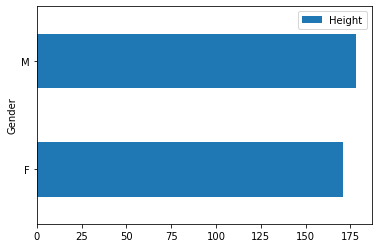

In [119]:
display(df.groupby("Gender")["Height"].mean())
df.groupby("Gender")[["Height"]].mean().plot(kind='barh')

In [120]:
display(df.groupby("Gender")[["Age"]].mean())

,Age
Gender,
F,26.75
M,25.00


A useful function is `size()`, which counts how large each of the groups is.

In [121]:
df.groupby("Gender").size() #count/number

Gender
F    4
M    4
dtype: int64

### Unique and Duplicate Values
Two functions can help us identify unique and duplicate values within Series objects. They are aptly names `unique()` and `duplicated()`, respectively. 

#### unique
`*.unique()` returns only unique values of a Series object.

In [122]:
s = pd.Series([1,2,3,2,3,4,3,5])
s.unique()

array([1, 2, 3, 4, 5], dtype=int64)

#### duplicate
`*.duplicated()` identifies duplicated values in Series objects and returns a boolean Series. Entries that have already been seen are marked as `True` while new values are marked as `False`.

In [123]:
s = pd.Series([1,2,3,2,3,4,3,5])
s.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
6     True
7    False
dtype: bool

<AxesSubplot:>

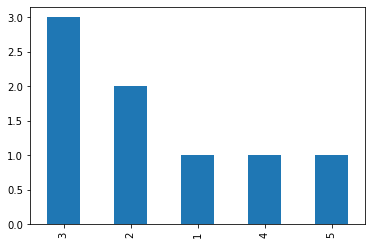

In [124]:
s.value_counts().plot(kind='bar')

When applied to Dataframes, `duplicated()` compares entire rows for duplicates.

In [125]:
df = pd.DataFrame([
    ["Dog", 5], 
    ["Cat", 4], 
    ["Dog", 5], 
    ["Fish", 2], 
    ["Cat", 8]], 
    columns=["Animal", "Age"])
display(df)
display(df.duplicated()) #returns boolean
display(df[df.duplicated()])

,Animal,Age
0,Dog,5
1,Cat,4
2,Dog,5
3,Fish,2
4,Cat,8


0    False
1    False
2     True
3    False
4    False
dtype: bool

,Animal,Age
2,Dog,5


To remove duplicate rows from a data frame we could `drop_duplicates()` function.

In [126]:
df.drop_duplicates()

,Animal,Age
0,Dog,5
1,Cat,4
3,Fish,2
4,Cat,8


To exclude duplicated rows from a data frame we could therefore do the following (just like in NumPy, booleans are negated with `~`)

In [127]:
display (df)
df.loc[~df.duplicated()]

,Animal,Age
0,Dog,5
1,Cat,4
2,Dog,5
3,Fish,2
4,Cat,8


,Animal,Age
0,Dog,5
1,Cat,4
3,Fish,2
4,Cat,8


### Exercises

#### Exercise 1
Load the "cars.csv" dataframe and calculate the average miles per gallon (column "mpg")

In [128]:
### Your code here

In [129]:
cars = pd.read_csv("../data/cars.csv")
cars.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [130]:
#average miles per gallon (column "mpg")
cars.mean()

C:\Users\farah\AppData\Local\Temp\ipykernel_15916\2735750842.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars.mean()


mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [131]:
cars["mpg"].mean()

20.090624999999996

#### Exercise 2
Cars can have 4, 6, or 8 cylinders (column "cyl"). Find the mean miles per gallon (column "mpg") for each of these classes **without** using the `groupby(...)` function.

*BONUS: Write a function that takes the number of cylinders and returns the mean miles per gallon.*

In [132]:
### Your code here cars["mpg"].mean()

In [133]:
cars.loc[cars["cyl"]==4, "mpg"].mean()

26.663636363636364

In [134]:
cars.loc[cars["cyl"]==4, ["cyl","mpg"]].mean()

cyl     4.000000
mpg    26.663636
dtype: float64

In [135]:
cars.loc[cars["cyl"]==6, ["cyl","mpg"]].mean()

cyl     6.000000
mpg    19.742857
dtype: float64

In [136]:
cars.loc[cars["cyl"]==8, ["cyl","mpg"]].mean()

cyl     8.0
mpg    15.1
dtype: float64

#### Exercise 3
Repeat the above exercise but this time make use of the `groupby(...)` function.

In [137]:
### Your code here display(df.groupby("Gender")["Height"].mean())

In [138]:
display(cars.groupby("cyl")["mpg"].mean())

cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64

<AxesSubplot:xlabel='cyl'>

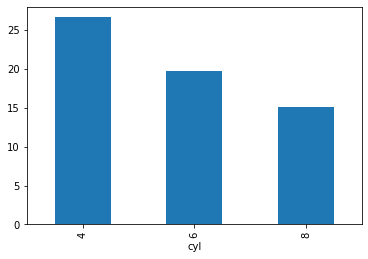

In [139]:
cars.groupby("cyl")["mpg"].mean().plot(kind='bar')

#### Exercise 4
Your client has a proprietary metric for car engine quality that is calculated as $Q = \frac{hp}{wt^2}$. Calculate this metric for all cars and then find the average for cars with a manual (column "am" == 1) or automatic (column "am" == 0) transmission.

**HINT** You can add the new metric as a column to your data frame via `cars["q_metric'] = ...`. 

Assignments to unknown column (or row) index names will result in new columns (or rows) to be appended to the data frame.

In [140]:
### Your code here

In [141]:
cars["q_metric"]=cars["hp"]/cars["wt"]**2

cars.groupby('am')['q_metric'].mean()

am
0    11.490145
1    21.216699
Name: q_metric, dtype: float64

## Merge Data Frames
Pandas data frames can be treated like SQL tables and joined.

In [142]:
sales = pd.DataFrame({
    "Date": pd.date_range(start="2018-10-01", end="2018-10-07"), 
    "ItemID": ["A401", "C776", "A401", "FY554", "Y98R", "Y98R", "FY554"]})
sales

,Date,ItemID
0,2018-10-01,A401
1,2018-10-02,C776
2,2018-10-03,A401
3,2018-10-04,FY554
4,2018-10-05,Y98R
5,2018-10-06,Y98R
6,2018-10-07,FY554


In [143]:
item_info = pd.DataFrame({
    "ID": ["A401", "C776", "FY554", "Y98R"],
    "Name": ["Toaster", "Vacuum Cleaner", "Washing Machine", "Clothes Iron"], 
    "Price": [25, 220, 540, 85]})
item_info

,ID,Name,Price
0,A401,Toaster,25
1,C776,Vacuum Cleaner,220
2,FY554,Washing Machine,540
3,Y98R,Clothes Iron,85


In [144]:
sales.merge(right=item_info, how="inner", left_on="ItemID", right_on="ID")

,Date,ItemID,ID,Name,Price
0,2018-10-01,A401,A401,Toaster,25
1,2018-10-03,A401,A401,Toaster,25
2,2018-10-02,C776,C776,Vacuum Cleaner,220
3,2018-10-04,FY554,FY554,Washing Machine,540
4,2018-10-07,FY554,FY554,Washing Machine,540
5,2018-10-05,Y98R,Y98R,Clothes Iron,85
6,2018-10-06,Y98R,Y98R,Clothes Iron,85


Merge types:
- **Inner**: keep only rows with corresponding IDs found in *both* data frames
- **Left**: use only rows with IDs found in the left data frame
- **Right**: use only rows with IDs found in the right data frame
- **Outer**: use all keys that are in at least one of the data frames. This is essentially the combination of left and right joins

Missing data will be replaced by `NaN` values

<img src="../images/JoinTypes.jpg" width=500 align=center>

In [145]:
sales = pd.DataFrame({
    "Date": pd.date_range(start="2018-10-01", end="2018-10-07"), 
    "ItemID": ["A401", "ZZZC776", "A401", "ZZZFY554", "Y98R", "Y98R", "FY554"]})
print("sales")
display(sales)

item_info = pd.DataFrame({
    "ID": ["A401", "C776", "FY554", "Y98R", "U1776"],
    "Name": ["Toaster", "Vacuum Cleaner", "Washing Machine", "Clothes Iron", "Computer"], 
    "Price": [25, 220, 540, 85, 899]})
print("item_info")
display(item_info)

sales


,Date,ItemID
0,2018-10-01,A401
1,2018-10-02,ZZZC776
2,2018-10-03,A401
3,2018-10-04,ZZZFY554
4,2018-10-05,Y98R
5,2018-10-06,Y98R
6,2018-10-07,FY554


item_info


,ID,Name,Price
0,A401,Toaster,25
1,C776,Vacuum Cleaner,220
2,FY554,Washing Machine,540
3,Y98R,Clothes Iron,85
4,U1776,Computer,899


In [146]:
sales.merge(right=item_info, how="inner", left_on="ItemID", right_on="ID")
#inner join, so both values kena ada in sales and item info
## notice some records left out of the merge results, inner join not include everything else

,Date,ItemID,ID,Name,Price
0,2018-10-01,A401,A401,Toaster,25
1,2018-10-03,A401,A401,Toaster,25
2,2018-10-05,Y98R,Y98R,Clothes Iron,85
3,2018-10-06,Y98R,Y98R,Clothes Iron,85
4,2018-10-07,FY554,FY554,Washing Machine,540


In [147]:
sales.merge(right=item_info, how="left", left_on="ItemID", right_on="ID")
#all data only from left, right will have NaN

,Date,ItemID,ID,Name,Price
0,2018-10-01,A401,A401,Toaster,25.0
1,2018-10-02,ZZZC776,NaN,NaN,NaN
2,2018-10-03,A401,A401,Toaster,25.0
3,2018-10-04,ZZZFY554,NaN,NaN,NaN
4,2018-10-05,Y98R,Y98R,Clothes Iron,85.0
5,2018-10-06,Y98R,Y98R,Clothes Iron,85.0
6,2018-10-07,FY554,FY554,Washing Machine,540.0


In [148]:
sales.merge(right=item_info, how="right", left_on="ItemID", right_on="ID")
#all data only from right, left will have NaN

,Date,ItemID,ID,Name,Price
0,2018-10-01,A401,A401,Toaster,25
1,2018-10-03,A401,A401,Toaster,25
2,NaT,NaN,C776,Vacuum Cleaner,220
3,2018-10-07,FY554,FY554,Washing Machine,540
4,2018-10-05,Y98R,Y98R,Clothes Iron,85
5,2018-10-06,Y98R,Y98R,Clothes Iron,85
6,NaT,NaN,U1776,Computer,899


In [149]:
sales.merge(right=item_info, how="outer", left_on="ItemID", right_on="ID")

,Date,ItemID,ID,Name,Price
0,2018-10-01,A401,A401,Toaster,25.0
1,2018-10-03,A401,A401,Toaster,25.0
2,2018-10-02,ZZZC776,NaN,NaN,NaN
3,2018-10-04,ZZZFY554,NaN,NaN,NaN
4,2018-10-05,Y98R,Y98R,Clothes Iron,85.0
5,2018-10-06,Y98R,Y98R,Clothes Iron,85.0
6,2018-10-07,FY554,FY554,Washing Machine,540.0
7,NaT,NaN,C776,Vacuum Cleaner,220.0
8,NaT,NaN,U1776,Computer,899.0


We can also merge on indices, either of one or both of the data frames

In [150]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(df1, df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [151]:
df1 = df1.set_index("employee")
df2 = df2.set_index("employee")
display(df1, df2)

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [152]:
df1.merge(df2, left_index=True, right_index=True) #join at index use syntax=> 'left_index=True'

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [153]:
df1.merge(df2, how="outer",left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [154]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue', 'Pat'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR', 'IT']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue', 'Tom'],
                    'hire_date': [2004, 2008, 2012, 2014, 2021]})
df2 = df2.set_index("employee")
display(df1, df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Pat,IT


,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014
Tom,2021


In [155]:
df1.merge(df2, left_on="employee", right_index=True) #default inner join

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [156]:
df1.merge(df2, how="outer", left_on="employee", right_index=True)

,employee,group,hire_date
0.0,Bob,Accounting,2008.0
1.0,Jake,Engineering,2012.0
2.0,Lisa,Engineering,2004.0
3.0,Sue,HR,2014.0
4.0,Pat,IT,NaN
NaN,Tom,NaN,2021.0


### Exercises

#### Exercise 1
Merge the three data frames so that we have all information available for Bob, Alice, Kevin, and Joshua in a single data frame

In [157]:
salaries = pd.DataFrame(
    data=[["Bob", 5000], ["Alice", 4000], ["Kevin", 8000]], 
    columns=["Name", "Salary"])
departments = pd.DataFrame(
    data=[["Kevin", "IT"], ["Joshua", "Data Science"], ["Bob", "Data Science"]], 
    columns=["Name", "Department"])
supervisors = pd.DataFrame(
    data=[["IT", "Jeremy"], ["Data Science", "Darren"], ["Sales", "Yvonne"]], 
    columns=["Department", "Supervisor"])

In [158]:
display("salaries" , salaries, "departments",  departments, "supervisors" ,  supervisors)

'salaries'

,Name,Salary
0,Bob,5000
1,Alice,4000
2,Kevin,8000


'departments'

,Name,Department
0,Kevin,IT
1,Joshua,Data Science
2,Bob,Data Science


'supervisors'

,Department,Supervisor
0,IT,Jeremy
1,Data Science,Darren
2,Sales,Yvonne


In [159]:
mergeSD=salaries.merge(departments, how="outer",left_on="Name", right_on="Name")
mergeSD

,Name,Salary,Department
0,Bob,5000.0,Data Science
1,Alice,4000.0,NaN
2,Kevin,8000.0,IT
3,Joshua,NaN,Data Science


In [160]:
mergeSD.merge(supervisors, how="left",left_on="Department", right_on="Department")

,Name,Salary,Department,Supervisor
0,Bob,5000.0,Data Science,Darren
1,Alice,4000.0,NaN,NaN
2,Kevin,8000.0,IT,Jeremy
3,Joshua,NaN,Data Science,Darren


In [161]:
#Alternative way ... same logic .. merge outer then merge left ...
salaries.merge(departments, how="outer").merge(supervisors, how="left")

,Name,Salary,Department,Supervisor
0,Bob,5000.0,Data Science,Darren
1,Alice,4000.0,NaN,NaN
2,Kevin,8000.0,IT,Jeremy
3,Joshua,NaN,Data Science,Darren


## Reshaping Data Frames
In data analysis, we speak of 'tall' and 'wide' data formats when refering to the structure of a data frame. A 'wide' data frame lists each feature in a separate column, e.g.

| Name | Age | Hair Color |
| ---- | --- | ---------- |
| Joe  | 41  | Brown      |
| Carl | 32  | Blond      |
| Mike | 22  | Brown      |
| Sue  | 58  | Black      |
| Liz  | 27  | Blond      |

A 'tall' data frame, on the other hand, collapses all features into a single column and uses an ID ("Name" in the example here) to keep track of which data point the feature value belongs to, e.g.

| Name | Feature    | Value |
| ---- | ---------- | ----- |
| Joe  | Age        | 41    |
| Carl | Age        | 32    |
| Mike | Age        | 22    |
| Sue  | Age        | 58    |
| Liz  | Age        | 27    |
| Joe  | Hair Color | Brown |
| Carl | Hair Color | Blond |
| Mike | Hair Color | Brown |
| Sue  | Hair Color | Black |
| Liz  | Hair Color | Blond |

Pandas lets us transform between these two formats.

In [162]:
df_wide = pd.DataFrame(
    data=[
        ["Joe", 41, "Brown", 55.7, 157], 
        ["Carl", 32, "Blond", 68.4, 177], 
        ["Mike", 22, "Brown", 44.4, 158], 
        ["Sue", 58, "Black", 82.2, 159], 
        ["Liz", 27, "Blond", 55.1, 169]], 
    columns=["Name", "Age", "Hair Color", "Weight", "Height"])
df_wide

,Name,Age,Hair Color,Weight,Height
0,Joe,41,Brown,55.7,157
1,Carl,32,Blond,68.4,177
2,Mike,22,Brown,44.4,158
3,Sue,58,Black,82.2,159
4,Liz,27,Blond,55.1,169


`melt(...)` transforms a wide-format dataframe into a tall format. The parameter `id_vars` takes a single or tuple of column names to be used as IDs. The remaining columns are treated as features and collapsed into (variable, value) pairs.

In [163]:
# Age, Hair Color, Weight and Height are implicitly assigned as value_vars
df_tall = df_wide.melt(id_vars="Name")
df_tall

,Name,variable,value
0,Joe,Age,41
1,Carl,Age,32
2,Mike,Age,22
3,Sue,Age,58
4,Liz,Age,27
5,Joe,Hair Color,Brown
6,Carl,Hair Color,Blond
7,Mike,Hair Color,Brown
8,Sue,Hair Color,Black
9,Liz,Hair Color,Blond


Transforming a data frame from the tall to the wide format is called *pivoting*.

In [164]:
df_tall.pivot(index="Name", columns="variable", values="value")

variable,Age,Hair Color,Height,Weight
Name,,,,
Carl,32,Blond,177,68.4
Joe,41,Brown,157,55.7
Liz,27,Blond,169,55.1
Mike,22,Brown,158,44.4
Sue,58,Black,159,82.2


## Exploratory Data Analysis
A large part of our task as data scientists and analysts is to find patterns and interesting phenomena within data. We can make use of Pandas' vast assortment of functions to help us with this. The following exercises are designed to help you get an idea of the kind of questions you can answer with Pandas.

This dataset describes all olympic athletes, the year they participated, the event they participated in, and whether they received a medal. The data is split into two files, `olympics_events.csv` and `olympics_games.csv`, describing the events and metadata of the games, respectively. The data has been adjusted from https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

### Exercise 1
1. Load the two files, `olympics_events.csv` and `olympics_games.csv`, and display the first 10 lines of each data frame.

In [505]:
### Your code here 2024
events=pd.read_csv("../data/olympics_events.csv")
games=pd.read_csv("../data/olympics_games.csv")
display(events.head(5),games.head(5))

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,GamesID
0,A Dijiang,M,24.0,180.0,80.0,CHN,Basketball,Basketball Men's Basketball,NaN,37
1,A Lamusi,M,23.0,170.0,60.0,CHN,Judo,Judo Men's Extra-Lightweight,NaN,48
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,Football,Football Men's Football,NaN,6
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Speed Skating,Speed Skating Women's 500 metres,NaN,36


,ID,Year,Season,City
0,0,1896,Summer,Athina
1,1,1900,Summer,Paris
2,2,1904,Summer,St. Louis
3,3,1906,Summer,Athina
4,4,1908,Summer,London


In [506]:
events = pd.read_csv("../data/olympics_events.csv")
games = pd.read_csv("../data/olympics_games.csv")
display(events.head(5),games.head(5))

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,GamesID
0,A Dijiang,M,24.0,180.0,80.0,CHN,Basketball,Basketball Men's Basketball,NaN,37
1,A Lamusi,M,23.0,170.0,60.0,CHN,Judo,Judo Men's Extra-Lightweight,NaN,48
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,Football,Football Men's Football,NaN,6
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Speed Skating,Speed Skating Women's 500 metres,NaN,36


,ID,Year,Season,City
0,0,1896,Summer,Athina
1,1,1900,Summer,Paris
2,2,1904,Summer,St. Louis
3,3,1906,Summer,Athina
4,4,1908,Summer,London


2. Merge the two data frames on the `GamesID` and `ID` columns. **Drop the now-unnecessary id-columns afterwards.**

In [507]:
### Your code here 2024
events.merge(games, how="inner", left_on="GamesID", right_on="ID").head(5)

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,GamesID,ID,Year,Season,City
0,A Dijiang,M,24.0,180.0,80.0,CHN,Basketball,Basketball Men's Basketball,NaN,37,37,1992,Summer,Barcelona
1,Mika Lauri Aarnikka,M,24.0,187.0,76.0,FIN,Sailing,Sailing Men's Two Person Dinghy,NaN,37,37,1992,Summer,Barcelona
2,Morten Gjerdrum Aasen,M,34.0,185.0,75.0,NOR,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN,37,37,1992,Summer,Barcelona
3,Arvi Aavik,M,22.0,185.0,106.0,EST,Wrestling,"Wrestling Men's Heavyweight, Freestyle",NaN,37,37,1992,Summer,Barcelona
4,M'Bairo Abakar,M,31.0,NaN,NaN,CHA,Judo,Judo Men's Half-Middleweight,NaN,37,37,1992,Summer,Barcelona


In [508]:
EventGames=events.merge(games, how="inner",left_on="GamesID", right_on="ID") 
display(EventGames.head(5))

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,GamesID,ID,Year,Season,City
0,A Dijiang,M,24.0,180.0,80.0,CHN,Basketball,Basketball Men's Basketball,NaN,37,37,1992,Summer,Barcelona
1,Mika Lauri Aarnikka,M,24.0,187.0,76.0,FIN,Sailing,Sailing Men's Two Person Dinghy,NaN,37,37,1992,Summer,Barcelona
2,Morten Gjerdrum Aasen,M,34.0,185.0,75.0,NOR,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN,37,37,1992,Summer,Barcelona
3,Arvi Aavik,M,22.0,185.0,106.0,EST,Wrestling,"Wrestling Men's Heavyweight, Freestyle",NaN,37,37,1992,Summer,Barcelona
4,M'Bairo Abakar,M,31.0,NaN,NaN,CHA,Judo,Judo Men's Half-Middleweight,NaN,37,37,1992,Summer,Barcelona


In [509]:
#2024
EventGames.drop(["GamesID", "ID"], axis='columns').head(5) #drop GamesID and ID

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,Year,Season,City
0,A Dijiang,M,24.0,180.0,80.0,CHN,Basketball,Basketball Men's Basketball,NaN,1992,Summer,Barcelona
1,Mika Lauri Aarnikka,M,24.0,187.0,76.0,FIN,Sailing,Sailing Men's Two Person Dinghy,NaN,1992,Summer,Barcelona
2,Morten Gjerdrum Aasen,M,34.0,185.0,75.0,NOR,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN,1992,Summer,Barcelona
3,Arvi Aavik,M,22.0,185.0,106.0,EST,Wrestling,"Wrestling Men's Heavyweight, Freestyle",NaN,1992,Summer,Barcelona
4,M'Bairo Abakar,M,31.0,NaN,NaN,CHA,Judo,Judo Men's Half-Middleweight,NaN,1992,Summer,Barcelona


### Exercise 2
History lesson! Malaysia's olympic nationality code is `MAS`. Prior to this, the Federation of Malaya competed under the code `MAL`. Likewise, Sarawak and Sabah competed as North Borneo (`NBO`).

1. In which years did the Federation of Malaya compete in the Olympics?

In [510]:
### Your code here 
#cars.loc[cars["cyl"]==4, ["cyl","mpg"]].mean()

In [511]:
#2024
EventGames.loc[EventGames["Nationality"]=="MAL", "Year"].unique()

array([1956, 1960], dtype=int64)

In [512]:
EventGames.loc[EventGames["Nationality"]=="MAL", "Year"].unique()

array([1956, 1960], dtype=int64)

2. How many athletes did they send?

In [513]:
### Your code here
EventGames.loc[EventGames["Nationality"]=="MAL", ["Name","Year"]]

,Name,Year
209701,Sheikh Ali bin Sheik Mohamed,1956
209778,Noel Arul,1956
210013,Abdul Rahim bin Ahmed,1956
210015,Raja Aslan bin Raja Ngah Ali,1956
210310,Chan Pak Lum,1956
210354,"Kwee Lim ""Joseph"" Chong",1956
210355,Annie Choong,1956
210368,Chuah Eng Kim,1956
210369,Chuah Eng Cheng,1956
210666,Salam Devendran,1956


In [514]:
EventGames.loc[EventGames["Nationality"]=="MAL", "Name"].unique()

array(['Sheikh Ali bin Sheik Mohamed', 'Noel Arul',
       'Abdul Rahim bin Ahmed', 'Raja Aslan bin Raja Ngah Ali',
       'Chan Pak Lum', 'Kwee Lim "Joseph" Chong', 'Annie Choong',
       'Chuah Eng Kim', 'Chuah Eng Cheng', 'Salam Devendran',
       'Fong Seow Hor', 'Manikavagasam Harichandra', 'Aman Ullah Karim',
       'Sinnayah Karuppiah Jarabalan', 'Koh Eng Tong', 'Thomas Lawrence',
       'Lee Kah Fook', 'Liew Foh Sin', 'Lim Heng Chek', 'Moe Fu Kiat',
       'Supaat T. Nadarajah', 'Kenneth Perera', 'Philip Selvaraj Sankey',
       'Rajaratnam S. Selvanayagam', 'Maslam Hamzah Shamsuddin',
       'Manikam N. Shanmuganathan', 'Michael Francis "Mike" Shepherdson',
       'Gian Singh', 'Tan Kim Bee', 'Gerald David "Gerry" Toft',
       'Peter Van Huizen', 'Wilfred "Freddy" Vias',
       'Shahrudin Mohamed Ali', 'Kaimar-ud-Din bin Maidin',
       'Chan Kooi Chye', 'Chung Kum Weng', 'Fong Seow Jit',
       'Manikavasagam "Mani" Jegathesan', 'Kuan King Lam', 'Ong Hock Eng'],
      dtype=

In [515]:
len(EventGames.loc[EventGames["Nationality"]=="MAL", "Name"].unique())
#For year 1956 & 1960

40

The issue in your code is related to operator precedence and proper parentheses usage. In Python, the & operator has higher precedence than the comparison operators (==), so it's evaluated before the comparisons. However, you need to ensure that the logical AND operation is performed after the comparisons. To fix this, you should enclose each condition within parentheses.

By enclosing each condition within parentheses, you ensure that the comparisons are performed first, and then the logical AND operation is applied to the results. This will correctly filter the DataFrame based on the specified conditions.

In [516]:
#EventGames.loc[EventGames["Nationality"]=="MAL" & EventGames["Year"]==1960, "Name"].unique() SALAH
EventGames.loc[(EventGames["Nationality"] == "MAL") & (EventGames["Year"] == 1960), "Name"].unique()

array(['Shahrudin Mohamed Ali', 'Kaimar-ud-Din bin Maidin',
       'Chan Kooi Chye', 'Chung Kum Weng', 'Fong Seow Hor',
       'Fong Seow Jit', 'Manikavasagam "Mani" Jegathesan',
       'Kuan King Lam', 'Ong Hock Eng'], dtype=object)

In [517]:
len(EventGames.loc[(EventGames["Nationality"] == "MAL") & (EventGames["Year"] == 1960), "Name"].unique())

9

In [518]:
len(EventGames.loc[(EventGames["Nationality"] == "MAL") & (EventGames["Year"] == 1956), "Name"].unique())

32

3. Who were the first countries to participate in the Olympic games (as per this data set)?

In [519]:
### Your code here
# [EventGames["Nationality"]=="MAL", "Name"].unique()
first_Year = EventGames["Year"].min()
first_Year

1896

In [520]:
earlyCountry=EventGames.loc[EventGames["Year"]==first_Year]
earlyCountry.head(5)

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,GamesID,ID,Year,Season,City
270736,Aristidis Akratopoulos,M,NaN,NaN,NaN,GRE,Tennis,Tennis Men's Singles,NaN,0,0,1896,Summer,Athina
270737,Aristidis Akratopoulos,M,NaN,NaN,NaN,GRE,Tennis,Tennis Men's Doubles,NaN,0,0,1896,Summer,Athina
270738,"Konstantinos ""Kostas"" Akratopoulos",M,NaN,NaN,NaN,GRE,Tennis,Tennis Men's Singles,NaN,0,0,1896,Summer,Athina
270739,"Konstantinos ""Kostas"" Akratopoulos",M,NaN,NaN,NaN,GRE,Tennis,Tennis Men's Doubles,NaN,0,0,1896,Summer,Athina
270740,Anastasios Andreou,M,NaN,NaN,NaN,GRE,Athletics,Athletics Men's 110 metres Hurdles,NaN,0,0,1896,Summer,Athina


In [521]:
earlyCountry["Nationality"].unique()
#countries = first_event["Nationality"].unique()

array(['GRE', 'GBR', 'SUI', 'USA', 'GER', 'FRA', 'HUN', 'AUS', 'AUT',
       'DEN', 'ITA', 'SWE'], dtype=object)

In [522]:
#2024 # [EventGames["Nationality"]=="MAL", "Name"].unique()
firstYear=EventGames["Year"].min()
firstYear

1896

In [523]:
#EventGames.loc[(EventGames["Nationality"] == "MAL") & (EventGames["Year"] == 1960), "Name"].unique()
EventGames.loc[EventGames["Year"] == firstYear, "Nationality"].unique()

array(['GRE', 'GBR', 'SUI', 'USA', 'GER', 'FRA', 'HUN', 'AUS', 'AUT',
       'DEN', 'ITA', 'SWE'], dtype=object)

4. How many men and women has Malaysia (`MAS`) sent to the Olympics in total? Keep in mind that athletes can participate in multiple events and multiple years. Each person should only ever be counted once.

*HINT*: As we're only interested in athlete names and their genders, it's easiest to drop other columns and not have to worry about them. Create a new data frame but don't overwrite `events` as we'll need it for later exercises as well, though.

In [524]:
### Your code here 2024
athleteMAS=EventGames.loc[EventGames["Nationality"]=="MAS", ["Name","Sex"]]
athleteMAS.head(5)

,Name,Sex
23,Mohamed Abdul Hadj,M
48,Lailin Abu Hassan,M
1036,Soon Mustafa bin Karim,M
1893,Cheah Soon Kit,M
3142,Ahmed Fadzil Zainal Abidin,M


In [525]:
#2024
athleteMASdrop=athleteMAS.loc[~athleteMAS.duplicated()] #drop duplicate
display(athleteMASdrop.groupby("Sex").count()) #count

,Name
Sex,
F,54
M,247


### Exercise 3
1. How many men and women has Malaysia (`MAS`) sent to the Olympics each year?

    Hint: This is a lot like the previous question except that athletes only count as duplicate now if they compete in multiple events in the same year. An athlete competing in multiple years is no longer duplicate.

In [526]:
### Your code here 2024
athleteMAS=EventGames.loc[EventGames["Nationality"]=="MAS", ["Name","Sex","Year"]]
athleteMAS.head(5)

,Name,Sex,Year
23,Mohamed Abdul Hadj,M,1992
48,Lailin Abu Hassan,M,1992
1036,Soon Mustafa bin Karim,M,1992
1893,Cheah Soon Kit,M,1992
3142,Ahmed Fadzil Zainal Abidin,M,1992


In [527]:
athleteMASdrop=athleteMAS.loc[~athleteMAS.duplicated()]
display(athleteMASdrop.groupby(["Year", "Sex"]).count())

Name
Year Sex      
1964 F       4
     M      57
1968 M      31
1972 F       3
     M      42
1976 M      23
1984 F       1
     M      20
1988 F       4
     M       5
1992 M      26
1996 F       3
     M      32
2000 F       8
     M      32
2004 F       8
     M      18
2008 F      14
     M      18
2012 F      13
     M      16
2016 F      15
     M      17

2. How does the ratio of male to female athletes sent by Malaysia compare to the global ratio for the year 2016?

In [528]:
### Your code here

In [529]:
Global2016=EventGames.loc[EventGames["Year"] == 2016,["Name","Sex"]]
Global2016.head(5)

#athleteMAS=EventGames.loc[EventGames["Nationality"]=="MAS", ["Name","Sex","Year"]]

,Name,Sex
128213,Andreea Aanei,F
128214,Nstor Abad Sanjun,M
128215,Nstor Abad Sanjun,M
128216,Nstor Abad Sanjun,M
128217,Nstor Abad Sanjun,M


In [530]:
MAS2016=EventGames.loc[(EventGames["Nationality"] == "MAS") & (EventGames["Year"] == 2016), ["Name","Sex"]]
MAS2016.head(5)

,Name,Sex
128355,Khairulnizam Mohd Afendy,M
128622,Nauraj Singh Randhawa Amarjit Singh,M
128734,Mohamad Khairul Anuar,M
128735,Mohamad Khairul Anuar,M
128926,Mohd Azizulhasni Awang,M


In [531]:
Global2016.groupby(["Sex"]).count()

,Name
Sex,
F,6223
M,7465


In [532]:
MAS2016.groupby(["Sex"]).count()

,Name
Sex,
F,19
M,23


In [533]:
(MAS2016.groupby(["Sex"]).count())/(Global2016.groupby(["Sex"]).count())*100

,Name
Sex,
F,0.305319
M,0.308104


### Exercise 4
Let's start looking at some of the numerical data!

1. How many gold medals has each country won? How about Malaysia (`MAS`)?

In [534]:
### Your code here 2024

In [535]:
MASMedal=EventGames.loc[(EventGames["Nationality"] == "MAS")&((EventGames["Medal"]=="Bronze")|(EventGames["Medal"]=="Silver")|
               (EventGames["Medal"]=="Gold"))]
MASMedal.head(5)

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,GamesID,ID,Year,Season,City
10581,"Razif Haji ""Ajib"" Sidek Mohamed",M,24.0,180.0,68.0,MAS,Badminton,Badminton Men's Doubles,Bronze,37,37,1992,Summer,Barcelona
10582,"Jalani Haji ""Alan"" Sidek Mohamed",M,28.0,178.0,69.0,MAS,Badminton,Badminton Men's Doubles,Bronze,37,37,1992,Summer,Barcelona
19402,Lee Chong Wei,M,29.0,170.0,68.0,MAS,Badminton,Badminton Men's Singles,Silver,48,48,2012,Summer,London
22577,Pandelela Rinong anak Pamg,F,19.0,159.0,55.0,MAS,Diving,Diving Women's Platform,Bronze,48,48,2012,Summer,London
74208,Cheah Soon Kit,M,28.0,180.0,73.0,MAS,Badminton,Badminton Men's Doubles,Silver,40,40,1996,Summer,Atlanta


In [536]:
MASMedal.groupby(["Medal"]).size()

Medal
Bronze     5
Silver    11
dtype: int64

In [537]:
EventGames.loc[EventGames["Medal"] == "Gold"].groupby(["Nationality"]).size()

Nationality
ALG      5
ANZ     20
ARG     91
ARM      2
AUS    348
      ... 
UZB     10
VEN      2
VIE      1
YUG    130
ZIM     17
Length: 109, dtype: int64

#### Stacking and Unstacking Data Frames 
The previous solution is in an acceptable format, but it's not the most human-friendly way to present data. Instead, we can *unstack* our data and bring it into *wide* format.

In [540]:
#medal_table_wide = medal_table.unstack(fill_value=0)
#medal_table_wide

The opposite operation, `*.stack()` brings it back into the original *long* format.

In [541]:
#medal_table_wide.stack()

### Exercise 5
1. What is the median age of gold medalists?

In [ ]:
### Your code here

In [542]:
#EventGames.loc[EventGames["Medal"] == "Gold",["Age"]].min()
EventGames.loc[EventGames["Medal"] == "Gold","Age"].median()

25.0

2. What is the median age of gold, silver, and bronze medalists for each individual sport?

In [543]:
### Your code here

In [544]:
# MC
events.groupby(["Sport", "Medal"])["Age"].median().unstack() 

Medal,Bronze,Gold,Silver
Sport,,,
Aeronautics,NaN,26.0,NaN
Alpine Skiing,24.0,24.0,24.0
Alpinism,NaN,38.0,NaN
Archery,26.0,26.5,27.0
Art Competitions,42.0,40.0,41.0
...,...,...,...
Tug-Of-War,26.0,30.0,29.5
Volleyball,25.0,26.0,25.0
Water Polo,25.0,26.0,26.0


3. Look at only swimmers. How has the mean weight of all competitors changed throughout the years? Use `*.plot()` to get a visual sense of the trend.

In [545]:
### Your code here

<AxesSubplot:xlabel='Year'>

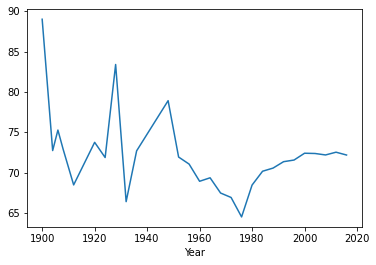

In [546]:
#EventGames.loc[EventGames["Sport"] == "Swimming","Weight"].median()
SwimWeight=EventGames.loc[EventGames["Sport"] == "Swimming"]
SwimWeight.groupby("Year")["Weight"].mean().plot(kind='line')

4. What is the mean and standard deviation of the BMI of athletes in each sports discipline? The BMI can be computed as 

    $$BMI = Weight~/~\left(\frac{Height}{100}\right)^2$$

    with the values in this dataset. To solve this question, break it down into individual steps:
    - Calculate the BMI for all athletes
    - Group by 'Sport'
    - Calculate the mean and standard deviation of the BMI of the grouped data frame
    
    *Hint*: Use `*.agg([..., ...])` to apply "mean" and "std" (standard deviation) simultaneously.

In [547]:
### Your code here
EventGames.head()

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,GamesID,ID,Year,Season,City
0,A Dijiang,M,24.0,180.0,80.0,CHN,Basketball,Basketball Men's Basketball,NaN,37,37,1992,Summer,Barcelona
1,Mika Lauri Aarnikka,M,24.0,187.0,76.0,FIN,Sailing,Sailing Men's Two Person Dinghy,NaN,37,37,1992,Summer,Barcelona
2,Morten Gjerdrum Aasen,M,34.0,185.0,75.0,NOR,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN,37,37,1992,Summer,Barcelona
3,Arvi Aavik,M,22.0,185.0,106.0,EST,Wrestling,"Wrestling Men's Heavyweight, Freestyle",NaN,37,37,1992,Summer,Barcelona
4,M'Bairo Abakar,M,31.0,NaN,NaN,CHA,Judo,Judo Men's Half-Middleweight,NaN,37,37,1992,Summer,Barcelona


In [548]:
EventGames["BMI"]=EventGames["Weight"]/((EventGames["Height"]/100)**2)
#EventGames.groupby('Sport')['BMI'].mean()
EventGames.groupby('Sport')['BMI'].agg(["mean", "std"])

,mean,std
Sport,,
Aeronautics,NaN,NaN
Alpine Skiing,23.801255,2.219729
Alpinism,NaN,NaN
Archery,23.202037,3.139277
Art Competitions,25.093782,3.661959
...,...,...
Tug-Of-War,27.467685,3.536557
Volleyball,22.460733,1.802740
Water Polo,24.586849,2.123657


### Exercise 6
1. What country has the most gold medals in wrestling?

In [549]:
### Your code here 2024
#.loc[(EventGames["Nationality"] == "MAS")&((EventGames["Medal"]=="Bronze")
WrestlingGold=EventGames.loc[(EventGames["Sport"] == "Wrestling")&(EventGames["Medal"] == "Gold")]
WrestlingGold.head(5)

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,GamesID,ID,Year,Season,City,BMI
362,An Han-Bong,M,23.0,163.0,62.0,KOR,Wrestling,"Wrestling Men's Bantamweight, Greco-Roman",Gold,37,37,1992,Summer,Barcelona,23.335466
794,Bruce Robert Baumgartner,M,31.0,188.0,130.0,USA,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",Gold,37,37,1992,Summer,Barcelona,36.781349
1527,Maik Bullmann,M,25.0,185.0,82.0,GER,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",Gold,37,37,1992,Summer,Barcelona,23.959094
3141,Arsen Suleymanovich Fadzayev,M,29.0,168.0,68.0,EUN,Wrestling,"Wrestling Men's Lightweight, Freestyle",Gold,37,37,1992,Summer,Barcelona,24.092971
3179,Pter Farkas,M,23.0,183.0,87.0,HUN,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Gold,37,37,1992,Summer,Barcelona,25.978680


In [550]:
#WrestlingGold.groupby("Nationality").size()
WrestlingGold.groupby("Nationality").size().sort_values(ascending=False)

Nationality
URS    62
USA    52
JPN    32
TUR    29
RUS    29
SWE    28
FIN    27
HUN    19
BUL    16
KOR    11
IRI     9
CUB     9
ITA     7
ROU     7
EUN     6
EST     5
POL     5
GER     5
SUI     4
NOR     4
UZB     4
YUG     4
FRA     4
AZE     4
GEO     3
CAN     3
PRK     3
GBR     3
UKR     3
EGY     2
CHN     2
DEN     2
ARM     2
GDR     2
TCH     1
KAZ     1
SRB     1
FRG     1
GRE     1
AUT     1
dtype: int64

In [551]:
# MC Dr's ans
events.loc[(events["Sport"] == "Wrestling")&(events["Medal"] == "Gold"), "Nationality"].value_counts() 

URS    62
USA    52
JPN    32
TUR    29
RUS    29
SWE    28
FIN    27
HUN    19
BUL    16
KOR    11
IRI     9
CUB     9
ITA     7
ROU     7
EUN     6
GER     5
POL     5
EST     5
FRA     4
UZB     4
NOR     4
AZE     4
SUI     4
YUG     4
GBR     3
UKR     3
PRK     3
GEO     3
CAN     3
DEN     2
ARM     2
EGY     2
GDR     2
CHN     2
TCH     1
KAZ     1
GRE     1
FRG     1
SRB     1
AUT     1
Name: Nationality, dtype: int64

2. How many different types of events have ever been held for fencing?

In [552]:
### Your code here

In [553]:
EventGames.loc[(EventGames["Sport"] == "Fencing"), "Event"].unique() 

array(["Fencing Men's Sabre, Team", "Fencing Men's Foil, Individual",
       "Fencing Men's epee, Team", "Fencing Men's Sabre, Individual",
       "Fencing Men's epee, Individual", "Fencing Men's Foil, Team",
       "Fencing Women's Foil, Individual", "Fencing Women's Foil, Team",
       "Fencing Women's epee, Individual",
       "Fencing Women's Sabre, Individual", "Fencing Women's epee, Team",
       "Fencing Men's Sabre, Masters, Individual",
       "Fencing Men's Foil, Masters, Individual",
       "Fencing Men's epee, Masters, Individual",
       "Fencing Men's epee, Masters and Amateurs, Individual",
       "Fencing Women's Sabre, Team",
       "Fencing Men's Sabre, Individual, Three Hits",
       "Fencing Men's Single Sticks, Individual"], dtype=object)

In [554]:
len(EventGames.loc[(EventGames["Sport"] == "Fencing"), "Event"].unique())

18

3. Typically, only one of each medal is awarded per year for each event. This is not the case for team sports, however. If a team wins the gold, then each team member is awarded a gold medal. What is the largest team to have ever been awarded gold medals for a single event in a single year?

In [555]:
### Your code here

In [556]:
EventGames.loc[(EventGames["Medal"] == "Gold"), "Event"].max() 

"Wrestling Women's Middleweight, Freestyle"

In [558]:
EventGames.loc[(EventGames["Event"] == "Wrestling Women's Middleweight, Freestyle")&(EventGames["Medal"] == "Gold")]

,Name,Sex,Age,Height,Weight,Nationality,Sport,Event,Medal,GamesID,ID,Year,Season,City,BMI
17860,Kaori Icho,F,28.0,166.0,61.0,JPN,Wrestling,"Wrestling Women's Middleweight, Freestyle",Gold,48,48,2012,Summer,London,22.136740
119595,Kaori Icho,F,24.0,166.0,61.0,JPN,Wrestling,"Wrestling Women's Middleweight, Freestyle",Gold,46,46,2008,Summer,Beijing,22.136740
133983,Risako Kawai,F,21.0,160.0,61.0,JPN,Wrestling,"Wrestling Women's Middleweight, Freestyle",Gold,50,50,2016,Summer,Rio de Janeiro,23.828125
146779,Kaori Icho,F,20.0,166.0,61.0,JPN,Wrestling,"Wrestling Women's Middleweight, Freestyle",Gold,44,44,2004,Summer,Athina,22.136740
